### Importing necessary packages.

In [87]:
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Understanding data set:
This dataset included Information about 28 brands of clean and used vehicles for sale in US. Twelve features were assembled for each car in the dataset
Description of our dataset columns:
- Price	(Integer):The sale price of the vehicle in the ad
- Years	(Integer):The vehicle registration year
- Brand	(String):The brand of car
- Model	(String):model of the vehicle
- Color	(String):Color of the vehicle
- State/City (String): The location in which the car is being available for purchase
- Mileage (Float): miles traveled by vehicle
- Vin (String):	The vehicle identification number is a collection of 17 characters (digits and capital letters)
- Title Status (String): This feature included binary classification, which are clean title vehicles and salvage insurance
- Lot (Integer): A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.
- Condition	(String): Time
## Initial data set exploration

In [88]:
df=pd.read_csv('USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [89]:
df.drop(['Unnamed: 0','vin','lot'],axis=1,inplace=True)

In [90]:
df.shape

(2499, 10)

In [91]:
df.dtypes

price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
state            object
country          object
condition        object
dtype: object

In [92]:
df.duplicated().sum()

0

In [93]:
df.isna().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
condition       0
dtype: int64

Recap:
- Our data set consists of 2499 rows and 3 columns.
- vin,lot columns are out of our concern, so they were deleted.
- Neither contain  duplicates nor missing data is presented in our dataset.
- Columns are of suitable data type, so no datatype conversion was needed.

## EDA
### Uni variate data analysis

In [94]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


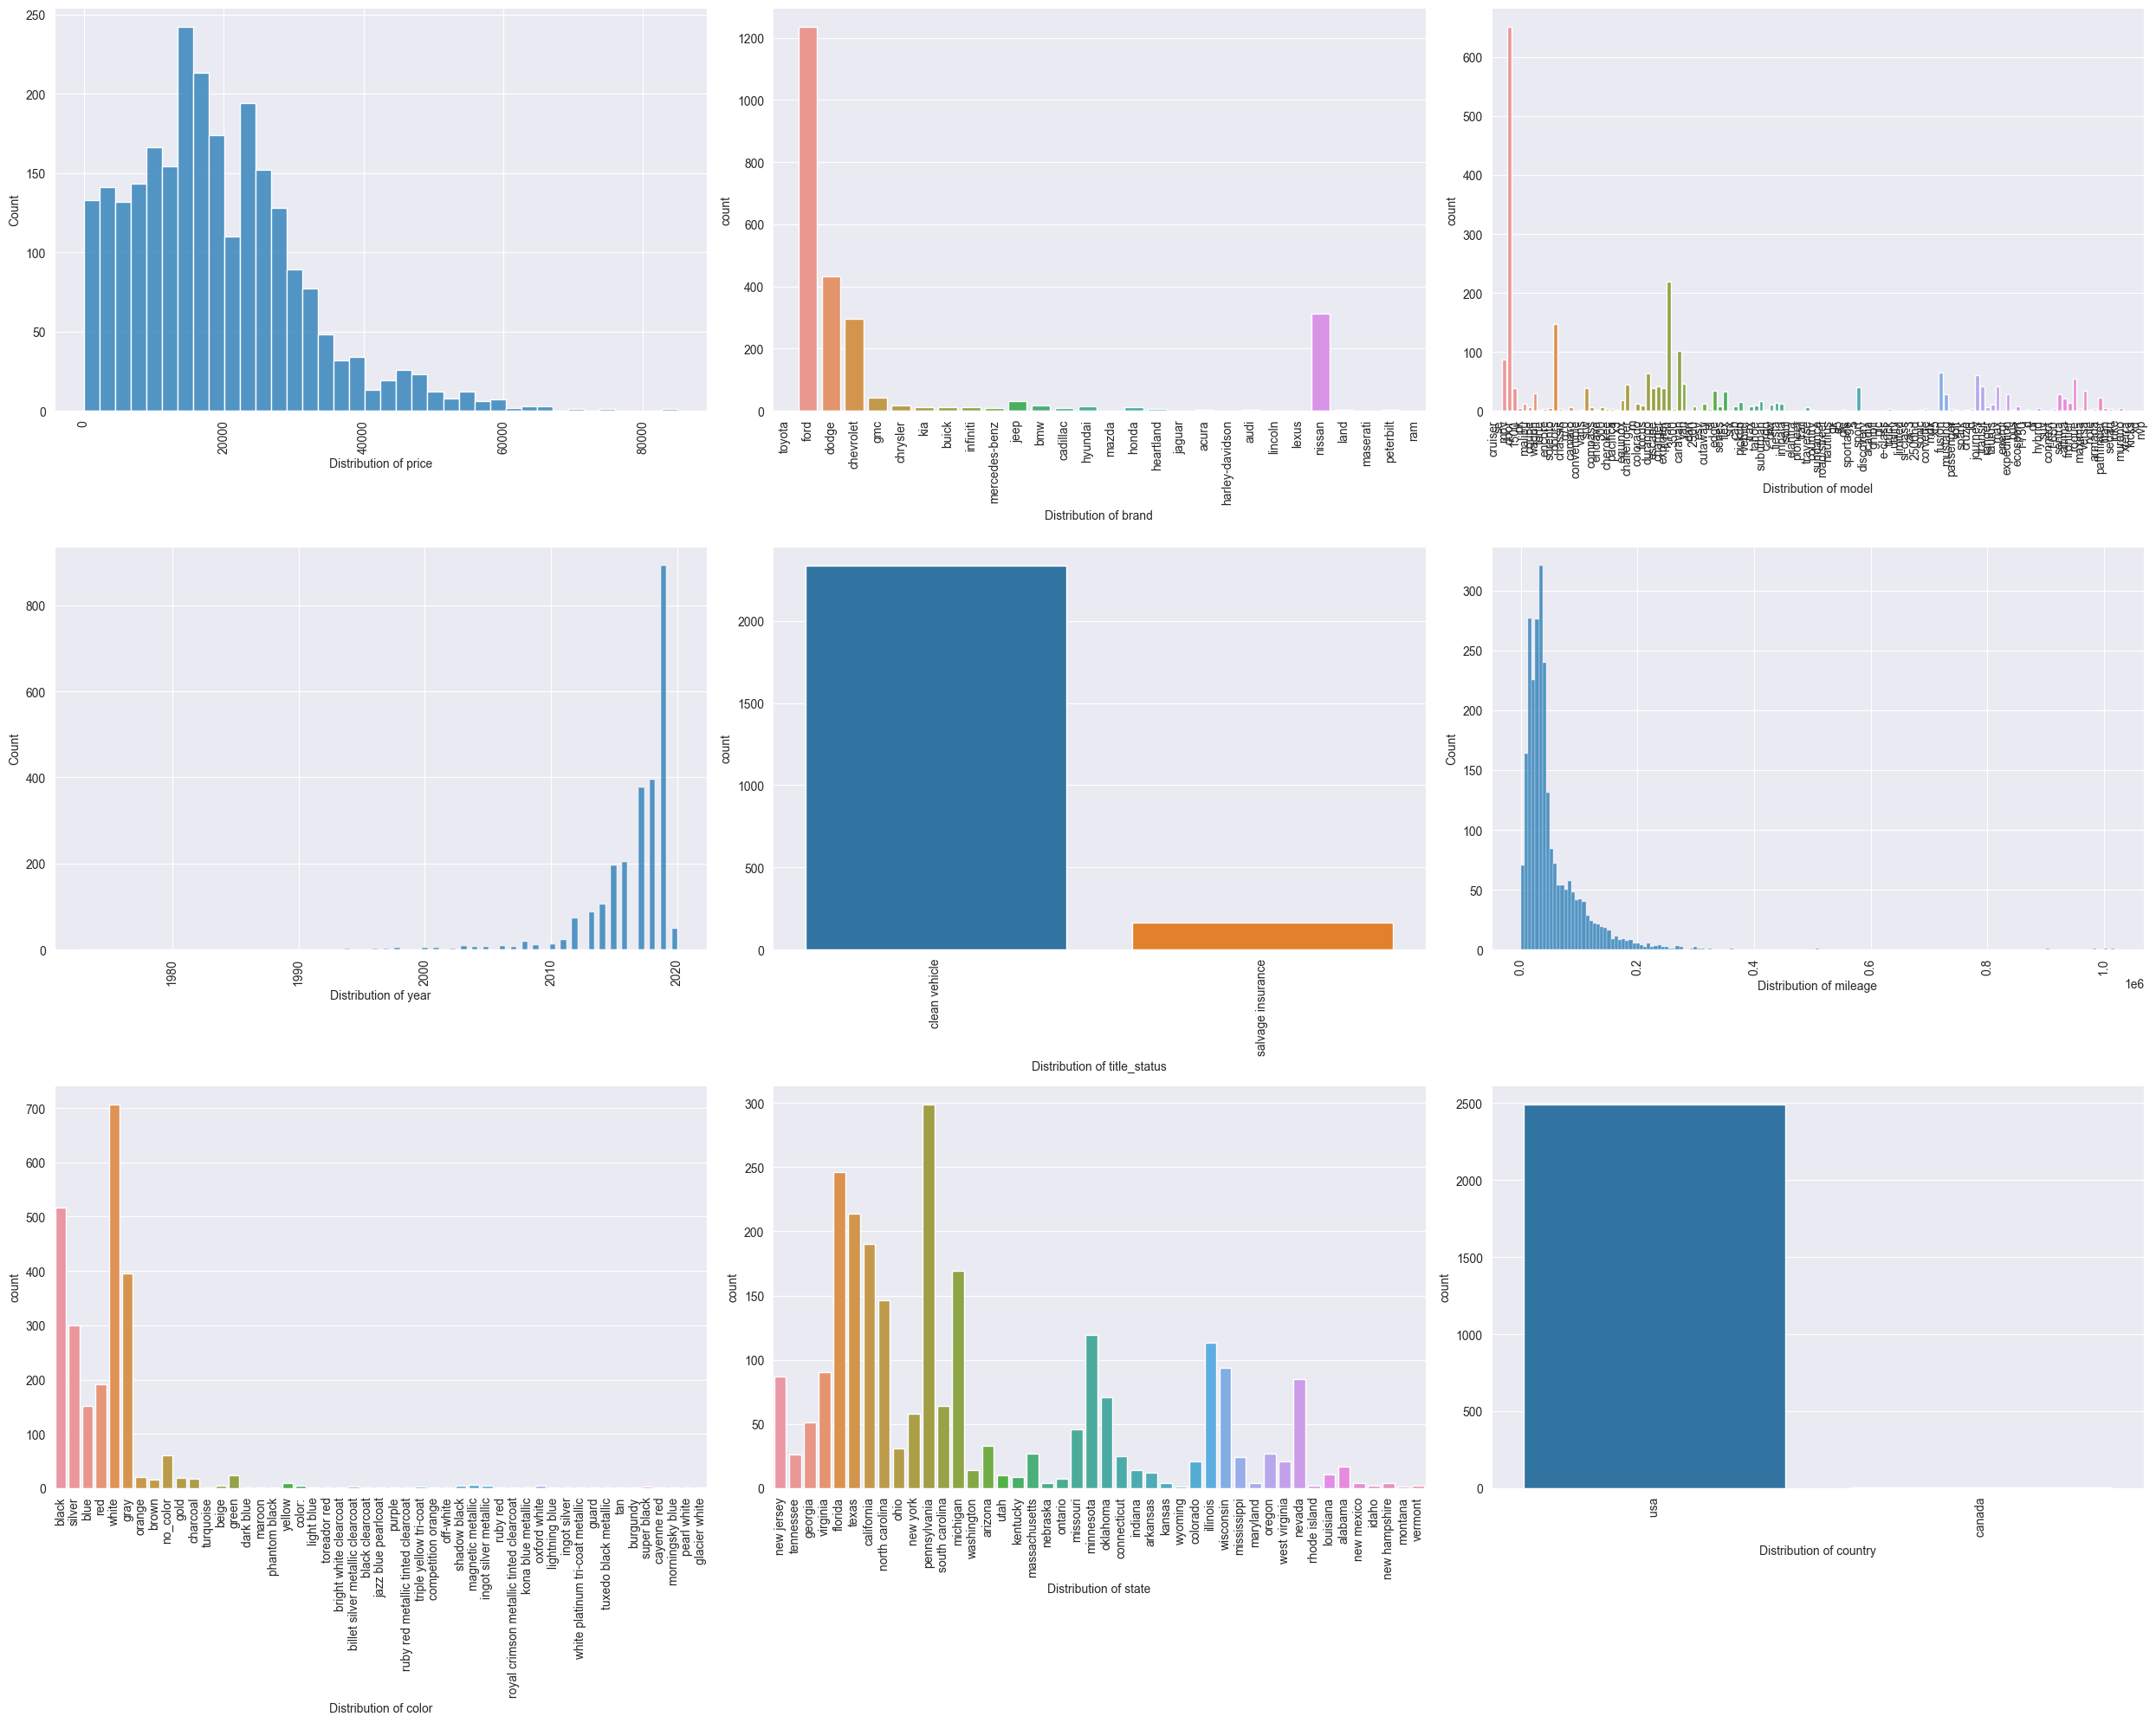

In [95]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(25,20))

for i in range(3):
    for j in range(3):
        index=(i*3)+j
        column=df.columns[index]
        ax=axes[i][j]
        column_type = df[column].dtype
        if column_type == 'object':
            sns.countplot(data=df, x=column,ax=ax)
        else:
            sns.histplot(data=df, x=column,ax=ax)

        ax.set(xlabel=f'Distribution of {column}')
        ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Insights from uni variate analysis :
- price ranges from 0 to more than 55K dollars, some extreme prices presented. Certainly, that is because of some brands and models are more expensive in comparison with others.
- The most common car brand is ford.
- maserati, jaguar, harley-davidson, ram and toyota are the least common car brands.
- The most common car colors are: gray, black and white.
- However, this data represents usa cars, there are few cars from Canada.
- Pennsylvania and Florida are the common states.

## Bi-variate nad Multi-variate analysis
Tracking rate of change of car prices over year column.

[(2000.0, 2020.0), Text(0.5, 1.0, 'Price VS Year')]

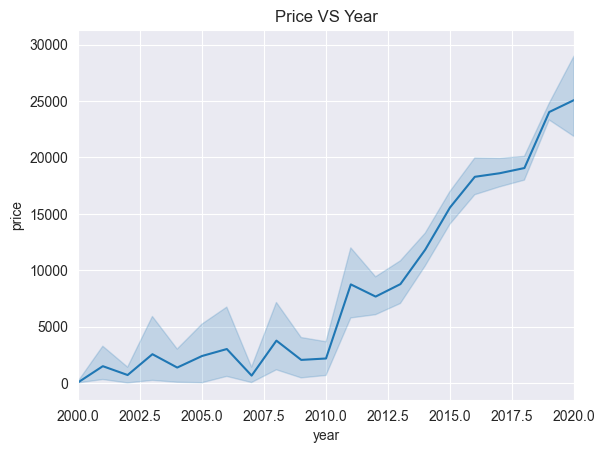

In [96]:
fig, ax = plt.subplots()
sns.lineplot(data=df,x='year',y='price',ax=ax,)
ax.set(xlim=(2000,2020),title='Price VS Year')


- There are moderate positive correlation: (year,price) and (year,mileage).
- Mileage and precise are negatively weakly correlated.

<Axes: >

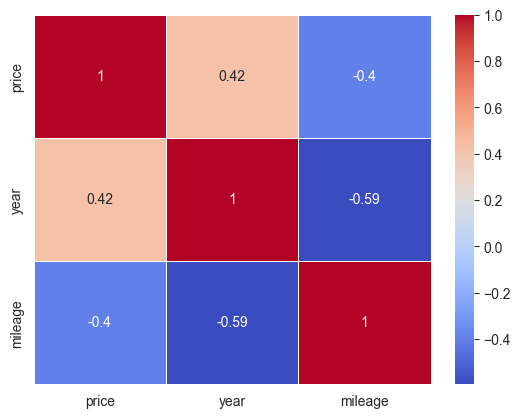

In [97]:
sns.heatmap(df.loc[:,['price','year','mileage']].corr(),cmap='coolwarm',annot=True,linewidths=.5)

harley-davidson is the most expensive brand.
ford which is the most common brand type has moderate price.

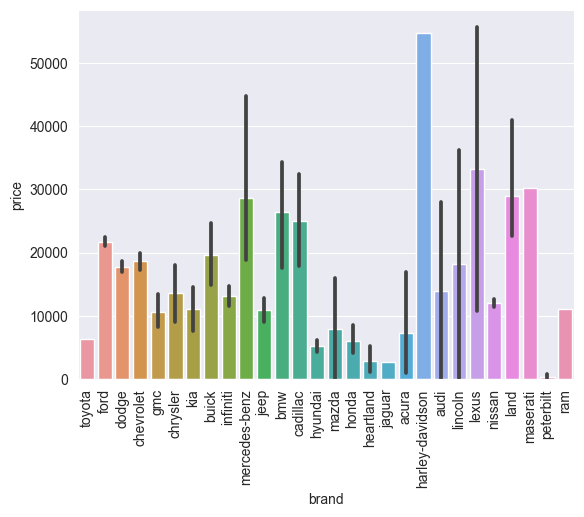

In [98]:
fig, ax = plt.subplots()
sns.barplot(data=df,x='brand',y='price',ax=ax)
ax.tick_params(axis='x', rotation=90)


Exploring the most expensive 5 models and cheapest 5 car models.

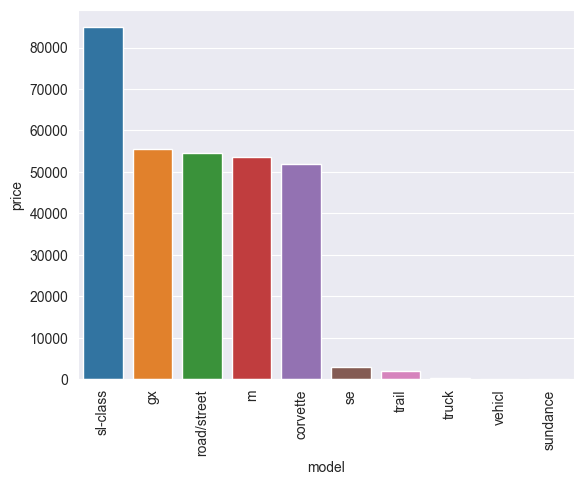

In [99]:
df_avg_price = df.groupby('model')['price'].mean().reset_index()
df_sorted = df_avg_price.sort_values('price', ascending=False)
top_5_expensive = df_sorted.head(5)
top_5_cheapest = df_sorted.tail(5)
subset = pd.concat([top_5_expensive, top_5_cheapest])
fig, ax = plt.subplots()
sns.barplot(data=subset, x='model', y='price', ax=ax)
ax.tick_params(axis='x', rotation=90)
